# Preprocess

In [1]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import time
import random
import numpy as np
import pickle
from pprint import pprint
# from test_unitaries import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_data = 200 # original: 20000
Nu= num_data
Nq = 4 # number of qubit
Ns = 100
O = 100 
seed = 1

## Generate binary strings with n bits 

In [3]:
def generate_binary_strings(bit_count):
    binary_strings = []
    def genbin(n, bs=''):
        if len(bs) == n:
            binary_strings.append(bs)
        else:
            genbin(n, bs + '0')
            genbin(n, bs + '1')
    genbin(bit_count)
    return binary_strings

## function to evaluate eq 15 ( j(h_1, h_2.....h_k, i, l))

In [4]:
def get_j(Nq, k):
    keys = generate_binary_strings(Nq)    
    j_ = []
    for key in keys:
        temp = 1
        for i in range(k):
            power = 1 - int(key[i])
            temp = temp * ((-1)**power)
        j_.append(temp)

    j = dict(zip(keys, j_))
    return j

## Equation 17

In [5]:
def get_moment_correlation_J( k_, Nu,counts, j, Ns):
    J = []
    keys = list(j.keys())
    num = 0
    # for each unitary Nu
    for i in range(Nu):
        temp = 0 
        for key in keys:
            if key in counts[i]:
                wt = (counts[i][key])
            else:
                wt = 0
            val = j[key]
            temp = temp + (wt * val)
        num = num + (temp**k_)    
    J = num/((Ns**k_) * Nu)
    return J

In [6]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

### generate training data for LRC and RDC with O = 100 , k = [1,2,3,4], k'= [1,2,3,4,5,6,7]

In [7]:
import sys
sys.path.append("../")
from test_unitaries import *

In [9]:
train_data_LRC = []
O = 100
for i in range(O):
    
    print(i, "th data generation started")
    
    t1 = time.time()
    
    # generation of measurement outcomes
    results = []
    for ii in range(1, num_data + 1):
        qc = QuantumCircuit(Nq, Nq)
        D = 2
        qc.append(LRC(Nq, D, to_gate=True, seeds = [seed + iii for iii in range(4)]), range(Nq))
        seed += 4
        qc.measure(range(Nq), range(Nq)[::-1])
        results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_simulator = 42, seed_transpiler = 42).result())
        # print(i, "...", ii, "th measurement finished")
    counts = []
    for result in results:
        counts.append(result.get_counts())
    
    # generation of input data
    train = []
    for k in range(1,5):
        j = get_j(Nq, k)
        for k_ in range(1,8):
            res = get_moment_correlation_J(k_, Nu, counts, j, Ns)
            train.append(res)
    train_data_LRC.append(train)
    
    t2 = time.time()
    
    print(i, "th data generation finished, time:", t2 - t1, "s")

0 th data generation started
0 th data generation finished, time: 1.4849417209625244 s
1 th data generation started
1 th data generation finished, time: 1.35955810546875 s
2 th data generation started
2 th data generation finished, time: 1.3005502223968506 s
3 th data generation started
3 th data generation finished, time: 1.363128900527954 s
4 th data generation started
4 th data generation finished, time: 1.2835109233856201 s
5 th data generation started
5 th data generation finished, time: 1.2984449863433838 s
6 th data generation started
6 th data generation finished, time: 1.2789900302886963 s
7 th data generation started
7 th data generation finished, time: 1.3593130111694336 s
8 th data generation started
8 th data generation finished, time: 1.5010168552398682 s
9 th data generation started
9 th data generation finished, time: 1.339284896850586 s
10 th data generation started
10 th data generation finished, time: 1.2396512031555176 s
11 th data generation started
11 th data gene

93 th data generation finished, time: 1.4550402164459229 s
94 th data generation started
94 th data generation finished, time: 1.2893037796020508 s
95 th data generation started
95 th data generation finished, time: 1.3088879585266113 s
96 th data generation started
96 th data generation finished, time: 1.3524701595306396 s
97 th data generation started
97 th data generation finished, time: 1.206157922744751 s
98 th data generation started
98 th data generation finished, time: 1.237346887588501 s
99 th data generation started
99 th data generation finished, time: 1.2064168453216553 s


In [15]:
train_data_RDC = []
O = 10
for i in range(O):
    
    print(i, "th data generation started")
    
    t1 = time.time()
    
    # generation of measurement outcomes
    results = []
    for ii in range(1, num_data + 1):
        qc = QuantumCircuit(Nq, Nq)
        D = 2
        qc.append(RDC(Nq, D, to_gate=True, seed = seed), range(Nq))
        qc.measure(range(Nq), range(Nq)[::-1])
        seed = seed + 1
        results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_simulator = 42, seed_transpiler = 42).result())
        # print(i, "...", ii, "th measurement finished")
    counts = []
    for result in results:
        counts.append(result.get_counts())
    
    # generation of input data
    train = []
    for k in range(1,5):
        j = get_j(Nq, k)
        for k_ in range(1,8):
            res = get_moment_correlation_J(k_, Nu, counts, j, Ns)
            train.append(res)
    train_data_RDC.append(train)
    
    t2 = time.time()
    
    print(i, "th data generation finished, time:", t2 - t1, "s")

0 th data generation started
0 th data generation finished, time: 26.77976393699646 s
1 th data generation started
1 th data generation finished, time: 26.289762258529663 s
2 th data generation started
2 th data generation finished, time: 26.227948904037476 s
3 th data generation started
3 th data generation finished, time: 27.565539836883545 s
4 th data generation started
4 th data generation finished, time: 25.49445629119873 s
5 th data generation started
5 th data generation finished, time: 25.48368000984192 s
6 th data generation started
6 th data generation finished, time: 24.59825897216797 s
7 th data generation started
7 th data generation finished, time: 24.94279980659485 s
8 th data generation started
8 th data generation finished, time: 25.954041004180908 s
9 th data generation started
9 th data generation finished, time: 26.695441961288452 s


<AxesSubplot:>

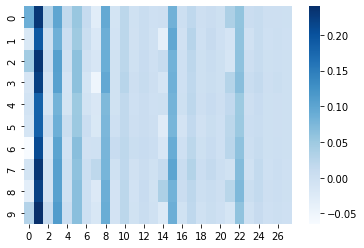

In [17]:
sns.heatmap(train_data_LRC[:10], cmap='Blues')

<AxesSubplot:>

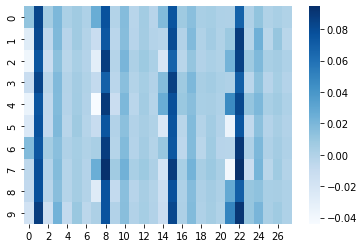

In [18]:
sns.heatmap(train_data_RDC[:10], cmap='Blues')

<AxesSubplot:>

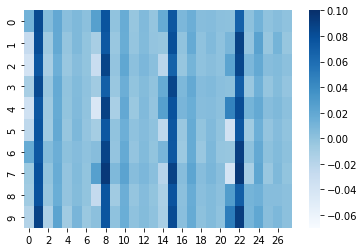

In [19]:
sns.heatmap(train_data_RDC, cmap='Blues', vmax=0.10, vmin=-0.07)

In [ ]:
sns.heatmap(train_data_LRC[:5], cmap='Blues', vmax=0.10, vmin=-0.05)

In [ ]:
sns.heatmap(train_data_RDC[:5], cmap='Blues', vmax=0.10, vmin=-0.05)

In [ ]:
with open("train_inputs_LRC2_simulator.pkl", "wb") as f:
    pickle.dump(train_data_LRC, f)

In [ ]:
with open("train_inputs_RDC2_simulator.pkl", "wb") as f:
    pickle.dump(train_data_RDC, f)